# Machine learning with graphs

## Assignment 7 (28/04/2021)

Notebook for Homeworks proposed in the MLG in the seminar of 2021 based on Machine learning with graphs course by Standford university.

    Author: Daniel Bacaicoa Barber


In [6]:
#Importing generic libraries.
import numpy as np
import pandas as pd
import scipy 

# Graph related libraries 
import networkx as nx

# Util libraries
from collections import Counter, OrderedDict
import itertools
import random

#Plotting library
import matplotlib.pyplot as plt
import copy

## 2 Node Embeddings with TransE

While many real world systems are effectively modeled as graphs, graphs can be a cumbersome format for certain downstream applications, such as machine learning models. It is often useful to represent each node of a graph as a vector in a continuous low dimensional space. The goal is to preserve information about the structure of the graph in the vectors assigned to each node. For instance, the spectral embedding in Homework 1 preserved structure in the sense that nodes connected by an edge were usually close together in the (one-dimensional) embedding $x$.

Multi-relational graphs are graphs with multiple types of edges. They are incredibly useful for representing structured information, as in knowledge graphs. There may be one node representing "Washington, DC" and another representing "United States", and an edge between them with the type "Is capital of". In order to create an embedding for this type of graph, we need to
capture information about not just which edges exist, but what the types of those edges are. In this problem, we will explore a particular algorithm designed to learn node embeddings for multi-relational graphs.

The algorithm we will look at is TransE ([See the 2013 NeurIPS paper by Bordes et al.](https://papers.nips.cc/paper/5071-translating-embeddings-for-modeling-multi-relational-data.pdf)).  We will first introduce some notation used in the paper describing this algorithm. We'll let a multi-relational graph $G = (E, S,L)$ consist of the set of entities $E$ (i.e., nodes), a set of edges $S$, and a set of possible relationships $L$. The set $S$ consists of triples $(h, l, t)$, where $h\in E$ is the *head* or source-node, $l\in L$ is the relationship, and $t \in E$ is the *tail* or destination-node. As a node embedding, TransE tries to learn embeddings of each entity $e \in E$ into $\mathbb{R}^k$ ($k$-dimensional vectors), which we will notate by ${\bf e}$. The main innovation of TransE is that each relationship $l$ is also embedded as a vector ${\bf l} \in \mathbb{R}^k$, such that the difference between the embeddings of entities linked via the relationship $l$ is approximately ${\bf l}$. That is, if $(h, l, t) \in S$, TransE tries to ensure that ${\bf h}+{\bf l} \approx {\bf t}$. Simultanesouly, TransE tries to make sure that ${\bf h}+{\bf l} \not\approx {\bf t}$ if the edge $(h, l, t)$ does not exist.

**Note on notation**: we will use unbolded letters $e$, $l$, etc. to denote the entities and relationships in the graph, and bold letters ${\bf e}$, ${\bf l}$, etc., to denote their corresponding embeddings.

TransE accomplishes this by minimizing the following loss:

$$\mathcal{L}=\sum_{(h,l,t)\in S}\left(\sum_{(h',l,t')\in S'_{(h,l,t)}} \left[ \gamma + d({\bf h}+{\bf l},{\bf t})-d({\bf h'}+{\bf l},{\bf t'})\right]_{+}\right)\qquad \quad (1)$$

Here $(h',l,t')$ are "corrupted" triplets, chosen from the set $S'_{(h,l,t)}$ of corruptions of $(h,l,t)$, which are all triples where either $h$ or $t$ (but not both) is replaced by a random entity.

$$ S'_{(h,l,t)}=\left\lbrace (h',l,t) | h' \in E \right\rbrace \cup \left\lbrace (h,l,t') | t' \in E\right\rbrace $$

Additionally, $\gamma >0$ is a fixed scalar called the margin, the function $d(\cdot, \cdot)$ is the Euclidean distance, and $\left[ \cdot \right]_{+}$ is the positive part function (defined as $\max(0,\cdot)$). Finally, TransE restricts all the entity embeddings to have length 1: $\Vert e \Vert_2 = 1$ for every $e \in E$.

For reference, here is the TransE algorithm, as described in the original paper on page 3:

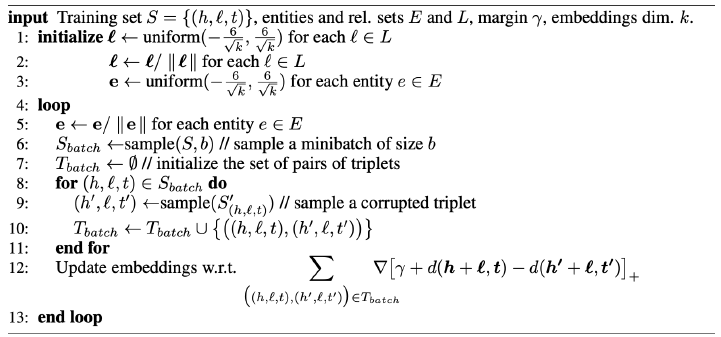

### 2.1 Warmup: Why the Comparative Loss?

Say we were intent on using a simpler loss function. Our objective function (1) includes a term maximizing the distance between ${\bf h'}+{\bf l}$ and ${\bf t'}$. If we instead simplified the objective, and just tried to minimize
$$\mathcal{L}_{\mathrm{simple}}=\sum_{(h,l,t)\in S} d({\bf h}+{\bf l},{\bf t})\qquad \qquad (2)$$
we would obtain a useless embedding. Give an example of a simple graph and corresponding embeddings which will minimize the new objective function (2) all the way to zero, but still give a completely useless embedding. (Note: your graph should be non-trivial, i.e., it should include at least two nodes and at least one edge. Assume the embeddings are in 2 dimensions, i.e., $k = 2$.)

**--Solution here--**

### 2.2 The Purpose of the Margin
We are interested in understanding what the margin term $\gamma$ accomplishes. If we removed the margin term $\gamma$ from our loss, and instead optimized

$$\mathcal{L}_{\mathrm{no\ margin}}=\sum_{(h,l,t)\in S}\left(\sum_{(h',l,t')\in S'_{(h,l,t)}} \left[d({\bf h}+{\bf l},{\bf t})-d({\bf h'}+{\bf l},{\bf t'})\right]_{+}\right)\qquad \quad (3)$$

it turns out that we would again obtain a useless embedding. Give an example of a simple graph and corresponding embeddings which will minimize the new objective function (3) all the way to zero, but still give a completely useless embedding. By useless, we mean that in your example, you cannot tell just from the embeddings whether two nodes are linked by a particular relation (Note:
your graph should be non-trivial, i.e., it should include at least two nodes and at least one edge.

Assume the embeddings are in 2 dimensions, i.e., $k = 2$.)

**--Solution here--**

### 2.3 Why are Entity Embeddings Normalized?

Recall that TransE normalizes every entity embedding to have unit length (see line 5 of the algorithm). The quality of our embeddings would be much worse if we did not have this step. To understand why, imagine running the algorithm with line 5 omitted.

What could the algorithm do to trivially minimize the loss in this case? What would the embeddings it generates look like?

**--Solution here--**

### 2.4 Where TransE fails
Give an example of a simple graph for which no perfect embedding exists, i.e., no embedding perfectly satisfies ${\bf u} + {\bf l} = {\bf v}$ for all $(u, l, v) \in S$ and ${\bf u} + {\bf l} \neq {\bf v}$ for all $(u, l, v) \not\in S$, for any choice of entity embeddings (${\bf e}$ for $e \in E$) and relationship embeddings (${\bf l}$ for $l \in L$). Explain why this graph has no perfect embedding in this system, and what that means about the expressiveness of TransE embeddings. Assume the embeddings are in 2 dimensions ($k = 2$).

**--Solution here--**